# 💳 Sentiment Analysis Brimo (Mobile Banking) Application

# Import Library

In [ ]:
# jika belum melakukan instalasi di environment

# preprocessing
# !pip install Sastrawi
# !pip install translate

# labeling
#!pip install tweet-preprocessor
# !pip install textblob
# !pip install wordcloud
# !pip install nltk

In [1]:
# main library
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# translation
from translate import Translator

# labeling
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# visualization
from wordcloud import WordCloud, STOPWORDS

nltk.download('punkt')
nltk.download('punkt_tab')

# naive bayes
import random
from textblob.classifiers import NaiveBayesClassifier

print('library berhasil diimport')

library berhasil diimport


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asrock\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asrock\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Import Data

In [2]:
# mengimport data menggunakan read_csv
df = pd.read_csv('review_brimo.csv', index_col=False)

print('data berhasil diimport')

data berhasil diimport


In [3]:
# menampilkan informasi data
df.info()
print('jumlah data dan kolom: ', df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              500 non-null    object
 1   userName              500 non-null    object
 2   userImage             500 non-null    object
 3   content               500 non-null    object
 4   score                 500 non-null    int64 
 5   thumbsUpCount         500 non-null    int64 
 6   reviewCreatedVersion  419 non-null    object
 7   at                    500 non-null    object
 8   replyContent          497 non-null    object
 9   repliedAt             497 non-null    object
 10  appVersion            419 non-null    object
dtypes: int64(2), object(9)
memory usage: 43.1+ KB
jumlah data dan kolom:  (500, 11)


In [4]:
# menampilkan 5 baris data pertama
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ebab940b-b44f-463a-a19c-d7c03d441c66,Among 526,https://play-lh.googleusercontent.com/a/ACg8oc...,kak tolong perbaiki lagi aplikasi BRIMO nya ma...,3,0,NaN,2025-07-28 06:07:00,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-07-28 06:26:22,NaN
1,c31b481c-0907-4b0f-a5f2-4508f0feac3f,Suryana 91,https://play-lh.googleusercontent.com/a-/ALV-U...,sangat sangat membantu sekali,5,0,2.85.0,2025-07-28 06:05:15,Terima kasih sudah menggunakan aplikasi BRImo ...,2025-07-28 06:26:10,2.85.0
2,72d3b252-d5fd-4b67-8ca4-8e9fa47fbd19,Rihatun Rihatun,https://play-lh.googleusercontent.com/a/ACg8oc...,baik sekali,5,0,NaN,2025-07-28 05:44:25,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2025-07-28 06:02:14,NaN
3,d4dcd298-06b4-47c0-8b7b-18d616286708,Adel lia,https://play-lh.googleusercontent.com/a/ACg8oc...,mantap amlikasi Bromo bisa di andal kan,5,0,2.83.0,2025-07-28 05:33:36,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2025-07-28 06:01:57,2.83.0
4,e4e59238-8105-4c31-b145-eb6161d884e0,Info Virall,https://play-lh.googleusercontent.com/a-/ALV-U...,"sudah 2 minggu rekening saya dibekukan, kenapa...",3,0,2.85.0,2025-07-28 05:02:47,"Hai Sobat BRI, mohon maaf atas kendala yang di...",2025-07-28 05:30:42,2.85.0


**Jumlah Data & Kolom**

- Dataset ini berisi data sebanyak `500 entry` ulasan aplikasi Brimo.
- Dataset ini memiliki jumlah kolom sebanyak `11 kolom`

**Missing Value**

- Terdapat beberapa kolom yang memiliki missing value, diantaranya `reviewCreatedVersion`, `replyContent`, `repliedAt`, `appVersion`          

# Cleaning Data

## Mengambil Kolom yang Diperlukan

In [5]:
# mengambil kolom tertentu
df = df[['content', 'userName', 'at']]
df.head()

,content,userName,at
0,kak tolong perbaiki lagi aplikasi BRIMO nya ma...,Among 526,2025-07-28 06:07:00
1,sangat sangat membantu sekali,Suryana 91,2025-07-28 06:05:15
2,baik sekali,Rihatun Rihatun,2025-07-28 05:44:25
3,mantap amlikasi Bromo bisa di andal kan,Adel lia,2025-07-28 05:33:36
4,"sudah 2 minggu rekening saya dibekukan, kenapa...",Info Virall,2025-07-28 05:02:47


## Mengecek Missing Value dan Data Duplikat

In [6]:
# mengecek missing value
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [7]:
# mengecek data duplikat
df.duplicated().sum()

np.int64(0)

**Temuan :** Tidak terdapat missing value dan data duplikat yang ditemukan

## Menghilangkan Karakter Khusus

In [8]:
# menghapus karakter khusus sepreti @ mentions, # hastags, dan URL
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['content'] = df['content'].apply(clean_text)
print('karakter khusus berhasil dihapus')

karakter khusus berhasil dihapus


In [9]:
df.head()

,content,userName,at
0,kak tolong perbaiki lagi aplikasi BRIMO nya ma...,Among 526,2025-07-28 06:07:00
1,sangat sangat membantu sekali,Suryana 91,2025-07-28 06:05:15
2,baik sekali,Rihatun Rihatun,2025-07-28 05:44:25
3,mantap amlikasi Bromo bisa di andal kan,Adel lia,2025-07-28 05:33:36
4,sudah 2 minggu rekening saya dibekukan kenapa ...,Info Virall,2025-07-28 05:02:47


## Mengubah Menjadi Lowercase

In [10]:
# mengubah menjadi huruf kecil
df['content'] = df['content'].str.lower()
print('content berhasil diubah menjadi lowercase')

content berhasil diubah menjadi lowercase


In [11]:
df.head()

,content,userName,at
0,kak tolong perbaiki lagi aplikasi brimo nya ma...,Among 526,2025-07-28 06:07:00
1,sangat sangat membantu sekali,Suryana 91,2025-07-28 06:05:15
2,baik sekali,Rihatun Rihatun,2025-07-28 05:44:25
3,mantap amlikasi bromo bisa di andal kan,Adel lia,2025-07-28 05:33:36
4,sudah 2 minggu rekening saya dibekukan kenapa ...,Info Virall,2025-07-28 05:02:47


# Preprocessing Data

In [ ]:
df.sample(10)

,content,userName,at
437,apk yg sangat cacat kinerja lambat uang di tf ...,Asrul A. Labugis,2025-07-26 15:06:46
484,sangat membantu dan modern,Alan Hidayat,2025-07-26 12:07:08
448,mantap,mario maskromo,2025-07-26 14:23:39
43,sangat puaas dan mantap,Imran Muara samudra,2025-07-27 22:05:41
113,transaksi makin mudah,Darmo Gandul,2025-07-27 18:08:40
152,,hanes hulu,2025-07-27 15:25:05
491,makasihhhh,Aei Sah,2025-07-26 11:40:54
251,good,Imam Arianto,2025-07-27 08:09:23
446,sangat membantu luarbiasa sehingga transaski a...,Ahmad Darajat,2025-07-26 14:31:01
136,praktissangat membantu,Mini Sulastri,2025-07-27 16:45:22


## Normalisasi

In [ ]:
normal = {' gk ':' tidak ', ' ga ':' tidak ', ' nga ':' tidak ', ' nggak ':' tidak ', ' ngga ':' tidak ', ' tdk ':' tidak ', ' enggak ':' tidak ', ' engga ':' tidak ', ' kga ':' tidak ', ' udh ':' sudah ', ' udah ':' sudah ', ' sdh ':' sudah ', ' bgt ':' banget ', ' bngt ':' banget ', ' aja ':' saja ', ' aj ':' saja ', ' blm ':' belum ', ' belom ':' belum ', ' dr ':' dari ', ' dri ':' dari ', ' dgn ':' dengan ', ' sm ':' sama ', ' sma ':' sama ', ' tp ':' tapi ', ' tpi ':' tapi ', ' km ':' kamu ', ' kmu ':' kamu ', ' klo ':' kalau ', ' klu ':' kalau ', ' kl ':' kalau ',
' sy ':' saya ', ' gw ':' saya ', ' gua ':' saya ', ' loe ':' kamu ', ' lu ':' kamu ', ' lg ':' lagi ', ' lgi ':' lagi ', ' trs ':' terus ', ' trus ':' terus ', ' jg ':' juga ', ' mlh ':' malah ', ' knp ':' kenapa ', ' krn ':' karena ', ' pdhl ':' padahal ', ' utk ':' untuk ', ' btw ':' omong-omong ', ' makasih ':' terima kasih ', ' makasi ':' terima kasih ', ' trimakasih ':' terima kasih ', ' thx ':' terima kasih ', ' tq ':' terima kasih ', ' terimakasih ':' terima kasih ', ' pls ':' tolong ', ' plis ':' tolong ', ' banget ':' sekali ', ' bangett ':' sekali ', ' bromo ':' brimo', ' amlikasi ':' aplikasi',
' mantabb ':' mantap ', ' gud ': ' good ', ' muas ':' puas ', ' trobel ':' trouble ', ' mantaf ':' mantap ', ' mantaff ':' mantap ', ' bgus ':' bagus ', ' mantabbb ':' mantap ', ' bagusss ':' bagus ', ' brimoo ':' brimo ', ' aplikaso ':' aplikasi ', ' kaga ':' tidak ', ' mudh ':' mudah '}

def normalisasi(str_text):
    for i in normal:
        str_text = str_text.replace(i, normal[i])
    return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
print('content berhasil dinormalisasi')

content berhasil dinormalisasi


In [ ]:
df.head()

,content,userName,at
0,kak perbaiki aplikasi brimo nya mau transfer d...,Among 526,2025-07-28 06:07:00
1,sangat sangat membantu sekali,Suryana 91,2025-07-28 06:05:15
2,baik sekali,Rihatun Rihatun,2025-07-28 05:44:25
3,mantap aplikasibrimobisa andal kan,Adel lia,2025-07-28 05:33:36
4,2 minggu rekening dibekukan bri kok jadi mempe...,Info Virall,2025-07-28 05:02:47


## Stopword

In [ ]:
# menambahkan kata `tidak` ke dalam daftar stopwords
more_stop_words = ['tidak']

# memanggil stopword
stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

# membuat array dictionary
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

# membuat function stopword
def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

# mengaplikasikan ke data
df['content'] = df['content'].apply(lambda x: stopword(x))
print('stopword berhasil dilakukan')

stopword berhasil dilakukan


In [ ]:
df.head()

,content,userName,at
0,kak perbaiki aplikasi brimo nya mau transfer d...,Among 526,2025-07-28 06:07:00
1,sangat sangat membantu sekali,Suryana 91,2025-07-28 06:05:15
2,baik sekali,Rihatun Rihatun,2025-07-28 05:44:25
3,mantap aplikasibrimobisa andal kan,Adel lia,2025-07-28 05:33:36
4,2 minggu rekening dibekukan bri kok jadi mempe...,Info Virall,2025-07-28 05:02:47


## Tokenize

In [ ]:
# memisahkan kata dari kalimat
tokenized = df['content'].apply(lambda x:x.split())

# melihat hasil tokenized
tokenized

0      [kak, perbaiki, aplikasi, brimo, nya, mau, tra...
1                     [sangat, sangat, membantu, sekali]
2                                         [baik, sekali]
3                [mantap, aplikasibrimobisa, andal, kan]
4      [2, minggu, rekening, dibekukan, bri, kok, jad...
                             ...                        
495                               [udah, update, dibuka]
496                                          [the, best]
497    [sekarang, force, close, sumpah, pengen, pinda...
498                                [brimo, tarik, tunai]
499    [menggunakan, brimo, lebih, cepat, aman, terpe...
Name: content, Length: 500, dtype: object

## Stemming

In [ ]:
# mengubah menjadi kata dasar
def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

print('stemming berhasil dilakukan')

kak baik aplikasi brimo nya mau transfer duit tgl 28 juli 2025 masuk duit tgl 29 juli 2025 payah aplikasi brimo
sangat sangat bantu sekali
baik sekali
mantap aplikasibrimobisa andal kan
2 minggu rekening beku bri kok jadi sulit nasabah
bagus
good job
sangat bagus mudah guna
sangat bantu butuh hari hari uang
aplikasi mau login selalu keluar sendiri banyak sekali keluh tanggap malah suruh setel sendiri hp konsumen semua setel apa tetep aplikasi selalu selalu keluar sendiri parahhh asli parah baik puas konsumen makasih
mohon segera baik bug nya hendak daftar pilih cabang kantor bri nya muncul bahkan masuk alamat kantor deteksi
jos

bagus
sangat baik
udah jelas laku tranferan bukti kirim bank tuju dana nya masuk sungguh jelek
lumayan
payahhhhh
min jgn kasih notif jam 1 pagi tiap hari kaget cok tidur nyenyak bangun denger notif brimo

bagus
oke makasih
mantap
mantap
nge bug
brimo aplikasi mobile banking paling the best
banyak update banyak ganggu sangat kecewa update bukan mau enak malah ga

In [ ]:
# menyimpan data hasil preprocessing ke format csv
tokenized.to_csv('review_brimo_clean.csv', index=False)

# Translation

Sebelumnya, import dulu data clean hasil preprocessing dari csv

In [ ]:
# import data clean
data = pd.read_csv('review_brimo_clean.csv')

print('data berhasil diimport')

data berhasil diimport


In [ ]:
# mengecek dulu apakah ada missing value
data.isnull().sum()

content    25
dtype: int64

In [ ]:
# menghapus data missing value
data.dropna(axis=0, inplace=True)

print('missing value berhasil dihapus')

missing value berhasil dihapus


In [ ]:
# mengecek jumlah data dan kolom
data.shape

(475, 1)

In [ ]:
# menerjemahkan bahasa indonesia ke bahasa inggris
def convert_eng(text):
    translator = Translator(to_lang='en', from_lang='id')
    translation = translator.translate(text)
    return translation

# terapkan di data
data['text_english'] = data['content'].apply(convert_eng)

print('berhasil di translate ke bahasa inggris')

berhasil di translate ke bahasa inggris


In [ ]:
# menyimpan data translate ke csv
data.to_csv('review_brimo_translate.csv', index=False)

# Labeling

Melakukan import data terlebih dahulu

In [13]:
# import data clean
data = pd.read_csv('review_brimo_translate.csv', index_col=False)

print('data berhasil diimport')

data berhasil diimport


In [14]:
data.head()

,content,text_english
0,kak baik aplikasi brimo nya mau transfer duit ...,"good brother, the Brimo application wants to t..."
1,sangat sangat bantu sekali,very very helpful
2,baik sekali,fantabulous
3,mantap aplikasibrimobisa andal kan,great appbrimobisa reliable kan
4,2 minggu rekening beku bri kok jadi sulit nasabah,2 weeks frozen account is difficult for customers


In [15]:
# membatasi jumlah data yang akan dilakukan analysis sentiment
data = data.head(300)
data

,content,text_english
0,kak baik aplikasi brimo nya mau transfer duit ...,"good brother, the Brimo application wants to t..."
1,sangat sangat bantu sekali,very very helpful
2,baik sekali,fantabulous
3,mantap aplikasibrimobisa andal kan,great appbrimobisa reliable kan
4,2 minggu rekening beku bri kok jadi sulit nasabah,2 weeks frozen account is difficult for customers
...,...,...
295,bank bri sekarang potong besar sekali potong 1...,bank bri now cut big cut 15 thousand severe if...
296,sulit login dong baik aplikasi nya,it's hard to login either the application
297,sangat bantu,very helpful
298,sangat nyaman,It's real convenient.


In [16]:
# melakukan labeling
data_review = list(data['text_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, text in enumerate(data_review):
    analysis = TextBlob(text)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

# menampilkan hasil labeling
print(f'Hasil Analisis Labeling:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Labeling:
Positif = 214
Netral = 65
Negatif = 21

Total Data : 300


In [17]:
# memasukkan hasil labeling ke kolom
data['klasifikasi'] = status

print('labeling berhasil dimasukkan ke kolom klasifikasi')

labeling berhasil dimasukkan ke kolom klasifikasi


In [18]:
data.head()

,content,text_english,klasifikasi
0,kak baik aplikasi brimo nya mau transfer duit ...,"good brother, the Brimo application wants to t...",Positif
1,sangat sangat bantu sekali,very very helpful,Positif
2,baik sekali,fantabulous,Netral
3,mantap aplikasibrimobisa andal kan,great appbrimobisa reliable kan,Positif
4,2 minggu rekening beku bri kok jadi sulit nasabah,2 weeks frozen account is difficult for customers,Negatif


# Visualisasi

## WordCloud

Text(0.5, 1.0, 'WordCloud - Semua Teks')

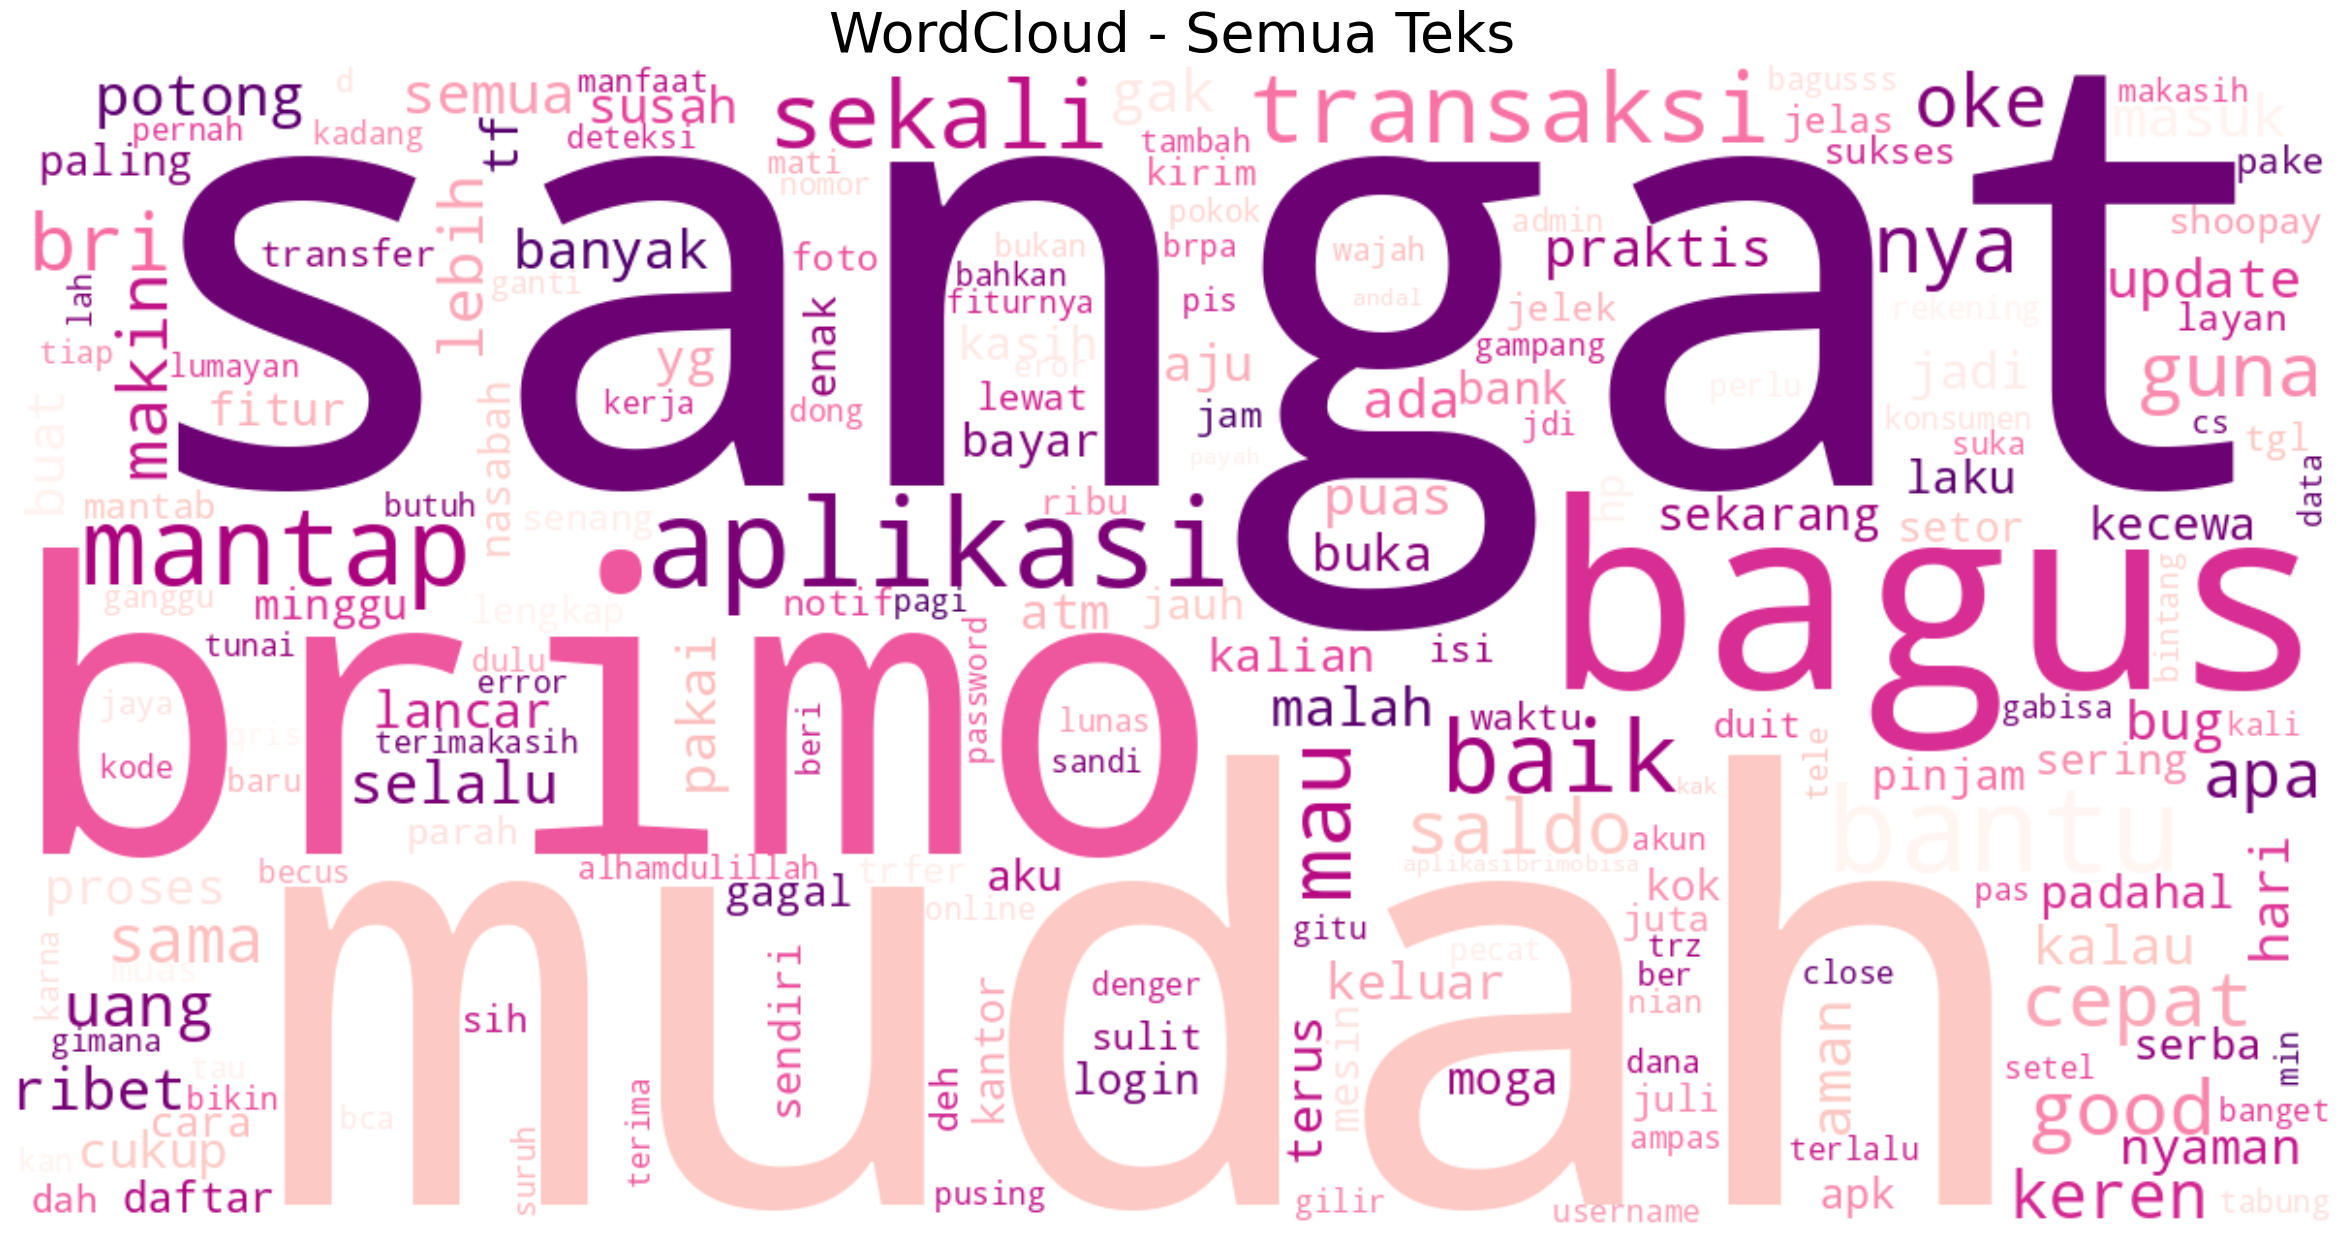

In [34]:
# membuat visualisasi wordcloud all
all_words = ' '.join([text for text in data['content']])

plt.figure(figsize = (30, 60))
wordcloud_all = WordCloud(
    width = 1600,
    height = 800,
    random_state = 3,
    background_color = 'white',
    colormap = 'RdPu',
    collocations = False,
    stopwords = STOPWORDS,
).generate(all_words)

plt.imshow(wordcloud_all, interpolation = 'bilinear')
plt.axis('off')
plt.title('WordCloud All', fontsize = 40)

Text(0.5, 1.0, 'WordCloud Positive')

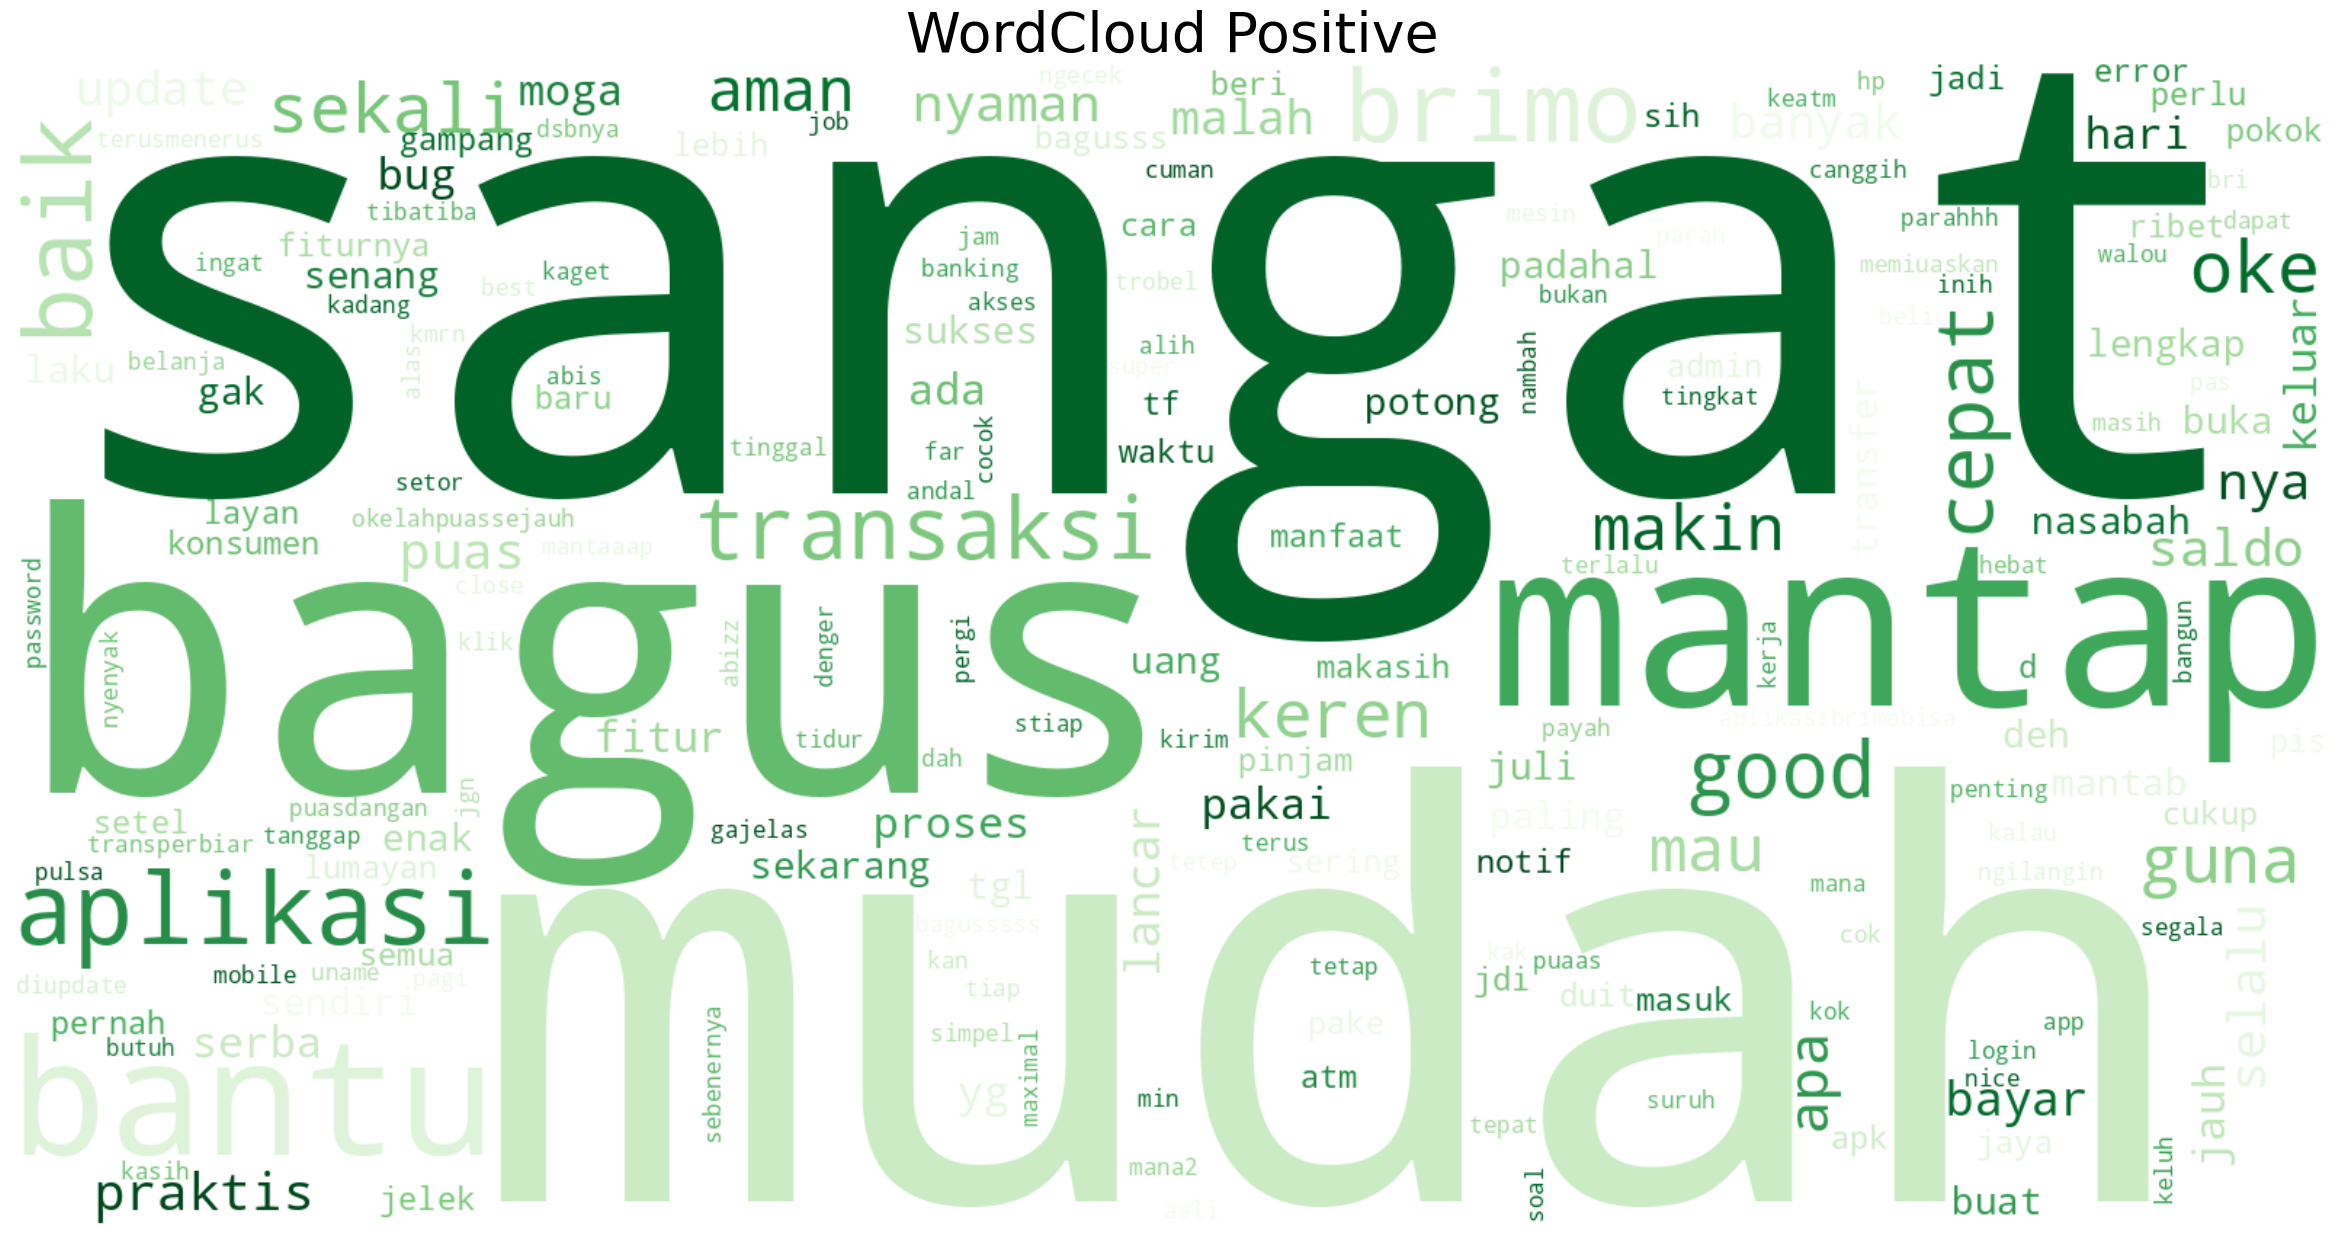

In [37]:
# membuat visualisasi wordcloud positive
positive_words = ' '.join([text for text in data['content'][data['klasifikasi'] == 'Positif']])

plt.figure(figsize = (30, 60))
wordcloud_all = WordCloud(
    width = 1600,
    height = 800,
    random_state = 3,
    background_color = 'white',
    colormap = 'Greens',
    collocations = False,
    stopwords = STOPWORDS,
).generate(positive_words)

plt.imshow(wordcloud_all, interpolation = 'bilinear')
plt.axis('off')
plt.title('WordCloud Positive', fontsize = 40)

Text(0.5, 1.0, 'WordCloud Negatif')

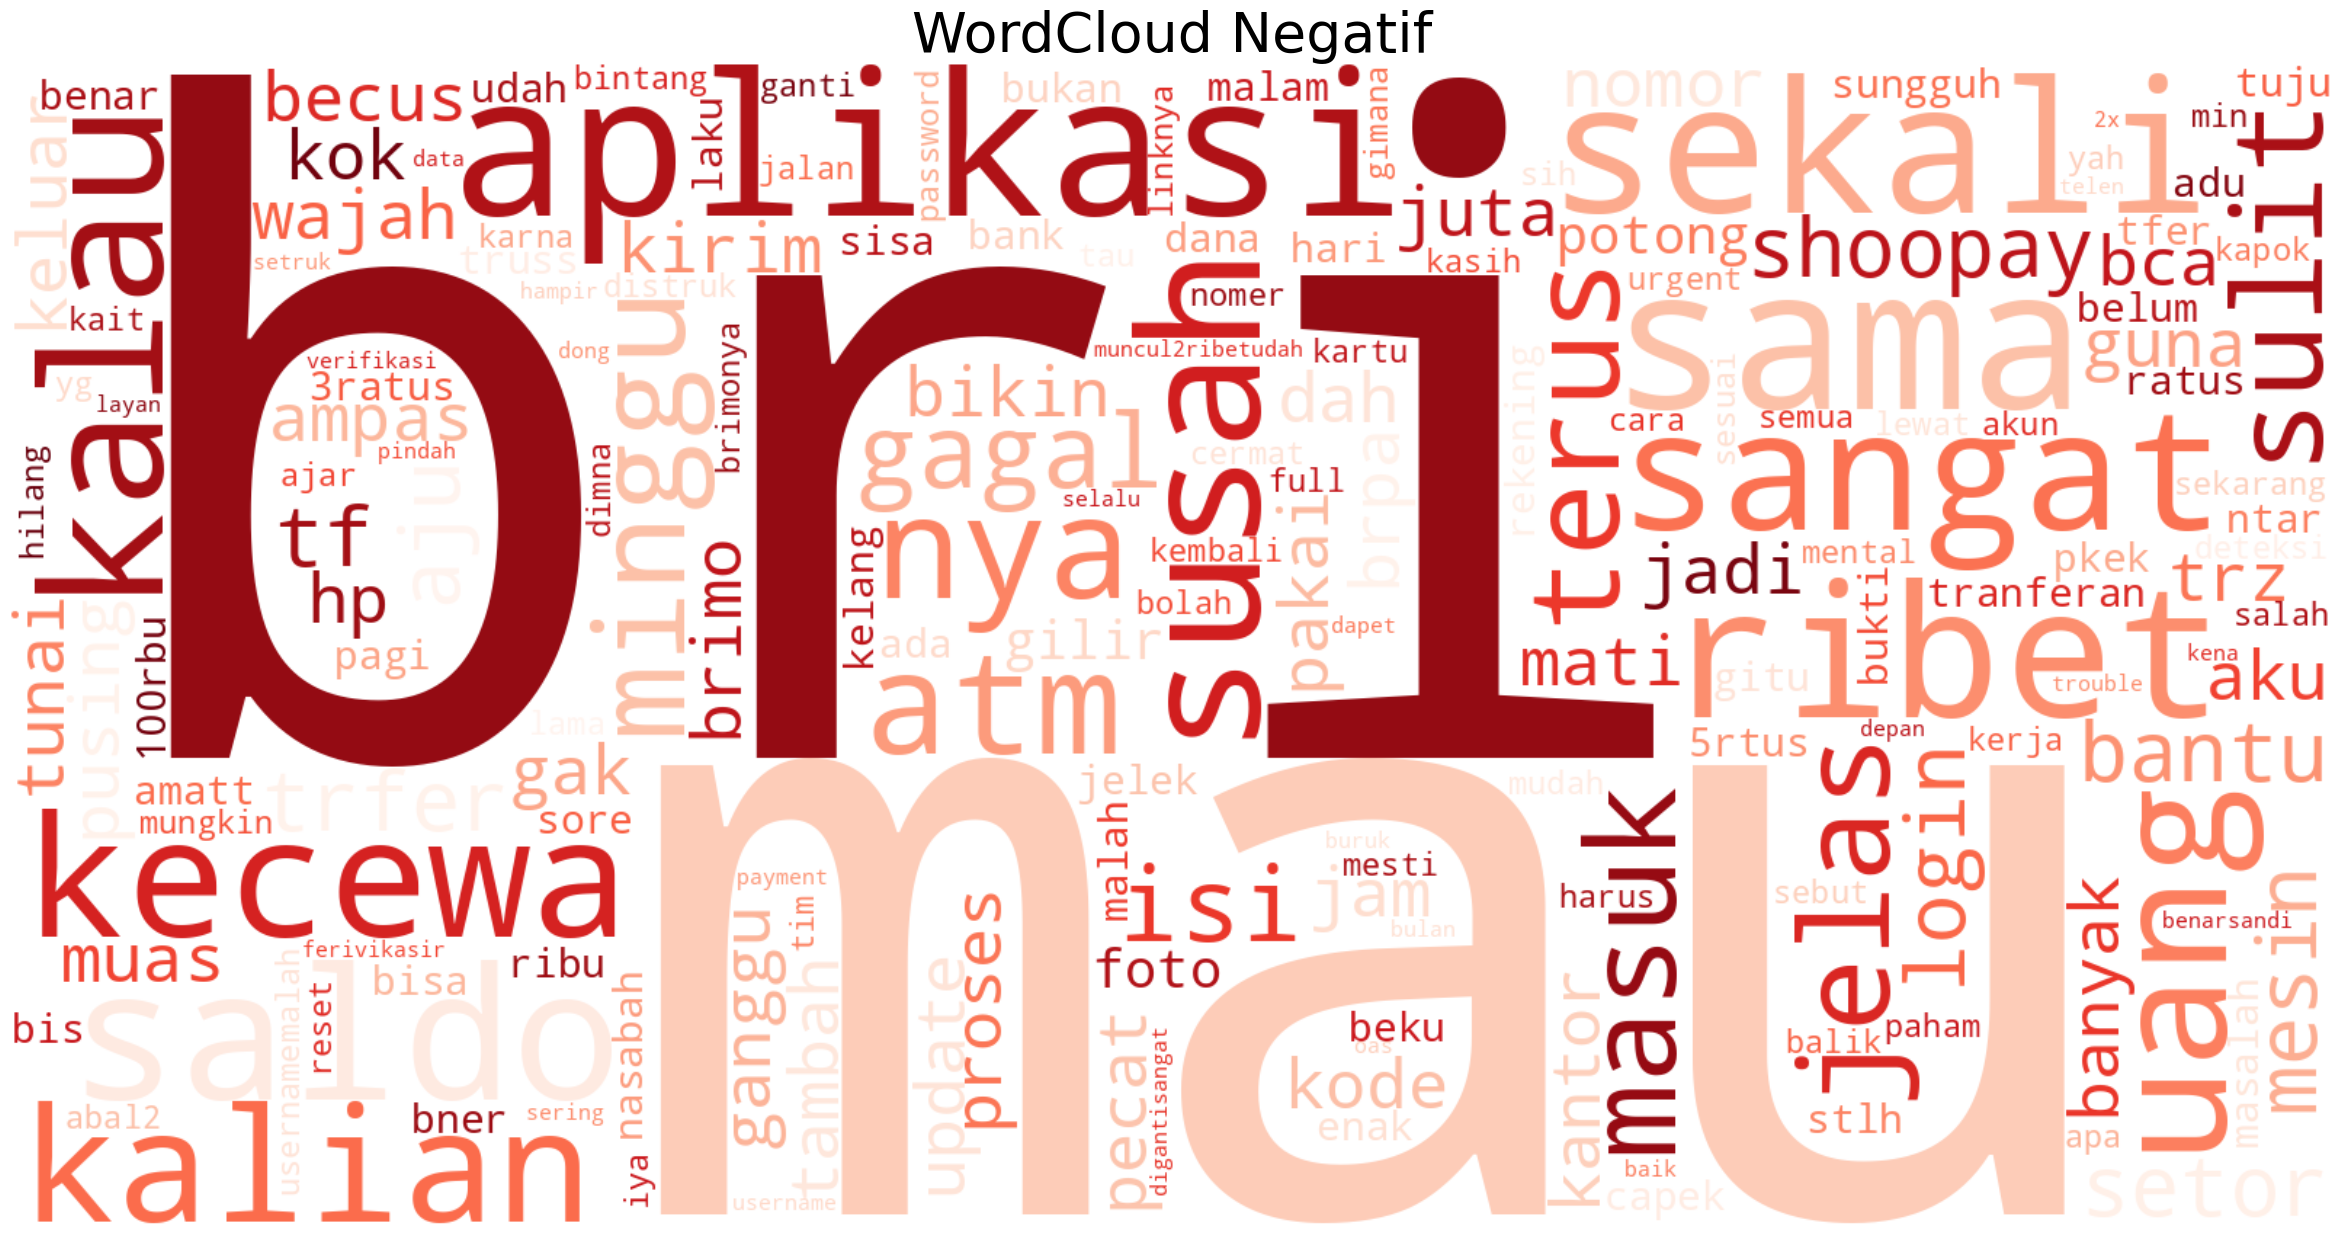

In [38]:
# membuat visualisasi wordcloud positive
negative_words = ' '.join([text for text in data['content'][data['klasifikasi'] == 'Negatif']])

plt.figure(figsize = (30, 60))
wordcloud_all = WordCloud(
    width = 1600,
    height = 800,
    random_state = 3,
    background_color = 'white',
    colormap = 'Reds',
    collocations = False,
    stopwords = STOPWORDS,
).generate(negative_words)

plt.imshow(wordcloud_all, interpolation = 'bilinear')
plt.axis('off')
plt.title('WordCloud Negatif', fontsize = 40)

## Distribusi Sentimen

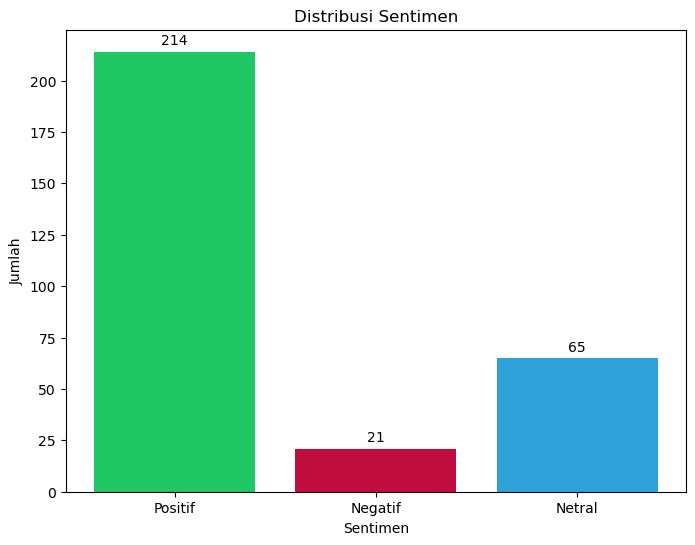

In [19]:
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#20c765', '#bf0d3e', '#2ea2d8'])

  # menambahkan label persentase
  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')


  # mengatur label sumbu dan judul
  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

# memanggil fungsi
show_bar_chart(labels, counts, 'Distribusi Sentimen')

# Classification Naive Bayes

In [21]:
# mengecek data
data.head()

,content,text_english,klasifikasi
0,kak baik aplikasi brimo nya mau transfer duit ...,"good brother, the Brimo application wants to t...",Positif
1,sangat sangat bantu sekali,very very helpful,Positif
2,baik sekali,fantabulous,Netral
3,mantap aplikasibrimobisa andal kan,great appbrimobisa reliable kan,Positif
4,2 minggu rekening beku bri kok jadi sulit nasabah,2 weeks frozen account is difficult for customers,Negatif


Karena untuk klasifikasi Naive Bayes kita hanya membutuhkan kolom `text_english` dan `klasifikasi`, maka untuk kolom `content` akan dihapus

In [22]:
dataset = data.drop(['content'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [23]:
set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
  if n[1] == 'Positif':
    set_positif.append(n)
  elif n[1] == 'Negatif':
    set_negatif.append(n)
  else:
    set_netral.append(n)

# melakukan random sample
set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

# membagi data train
train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
  train_set.append(n)

In [24]:
# melihat akurasi
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test: ', cl.accuracy(dataset))

Akurasi Test:  0.7866666666666666


Hasil akurasi yang didapatkan di angka 0.78, di mana angka ini tergolong lumayan dan bisa digunakan untuk analisis sentimen

In [25]:
# labeling menggunakan naive bayes
data_review = list(data['text_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, text in enumerate(data_review):
    analysis = TextBlob(text, classifier=cl)

    if analysis.classify() == 'Positif':
      total_positif += 1
    elif analysis.classify() == 'Netral':
      total_netral += 1
    else:
      total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 263
Netral = 27
Negatif = 10

Total Data : 300


Hasil analisis labeling tersebut selanjutnya kita masukkan ke dalam data yang kita punya sebelumnya

In [26]:
# memasukkan label ke kolom
status = pd.DataFrame({'klasifikasi_bayes' : status})
data['klasifikasi_bayes'] = status

In [27]:
# mengecek data
data

,content,text_english,klasifikasi,klasifikasi_bayes
0,kak baik aplikasi brimo nya mau transfer duit ...,"good brother, the Brimo application wants to t...",Positif,Positif
1,sangat sangat bantu sekali,very very helpful,Positif,Positif
2,baik sekali,fantabulous,Netral,Positif
3,mantap aplikasibrimobisa andal kan,great appbrimobisa reliable kan,Positif,Positif
4,2 minggu rekening beku bri kok jadi sulit nasabah,2 weeks frozen account is difficult for customers,Negatif,Netral
...,...,...,...,...
295,bank bri sekarang potong besar sekali potong 1...,bank bri now cut big cut 15 thousand severe if...,Netral,Netral
296,sulit login dong baik aplikasi nya,it's hard to login either the application,Negatif,Positif
297,sangat bantu,very helpful,Positif,Positif
298,sangat nyaman,It's real convenient.,Positif,Positif


Setelah dibandingkan hasil klasifikasi dengan menggunakan naive bayes, terlihat beberapa hasil labeling ada perbedaan seperti contohnya di baris 296 yang di mana klasifikasi memberikan label `negatif` sedangkan klasifikasi bayes memberikan label `positif`

Sedangkan jika kita melihat kalimatnya, kalimat tersebut mengarah ke makna negatif. Jadi dapat disimpulkan sementara, metode klasifikasi disesuaikan dengan kebutuhan dan karakteristik data yang ada

# Testing

In [29]:
def classify_text(text, cl):
  analysis = TextBlob(text, classifier=cl)
  return analysis.classify()

data_review = list(data['text_english'])
polaritas = 0

input_text = input('\nMasukkan teks yang ingin diuji: ')
hasil_klasifikasi = classify_text(input_text, cl)

print(f'\nHasil Klasifikasi: {hasil_klasifikasi}')


Hasil Klasifikasi: Positif
